In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, recall_score, f1_score


In [ ]:
raw_mail_data = pd.read_csv('/content/mail_data.csv') #loading the data from csv file to a pandas dataframe

In [ ]:
print(raw_mail_data)
print(raw_mail_data['Category'].value_counts())


     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]
Category
ham     4825
spam     747
Name: count, dtype: int64


In [ ]:
# replace the null values with a null string
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),'')

In [ ]:
from sklearn.utils import resample
import pandas as pd

# Step 1: Remove duplicates
raw_mail_data = raw_mail_data.drop_duplicates()

# Step 2: Separate ham and spam
ham = raw_mail_data[raw_mail_data['Category'] == 'ham']
spam = raw_mail_data[raw_mail_data['Category'] == 'spam']

# Step 3: Undersample ham to match the number of spam records (641)
ham_downsampled = resample(
    ham,
    replace=False,  # No replacement, just reduce the number of ham records
    n_samples=len(spam),  # Match the number of spam records (641)
    random_state=42
)

# Step 4: Combine and shuffle
balanced_mail_data = pd.concat([ham_downsampled, spam]).sample(frac=1, random_state=42).reset_index(drop=True)

# Step 5: Check class distribution
print(balanced_mail_data['Category'].value_counts())




Category
spam    641
ham     641
Name: count, dtype: int64


In [ ]:
# printing the first 5 rows of the dataframe
balanced_mail_data.head()

,Category,Message
0,spam,December only! Had your mobile 11mths+? You ar...
1,spam,"Dear Voucher Holder, To claim this weeks offer..."
2,spam,Had your contract mobile 11 Mnths? Latest Moto...
3,spam,What do U want for Xmas? How about 100 free te...
4,spam,You are a winner U have been specially selecte...


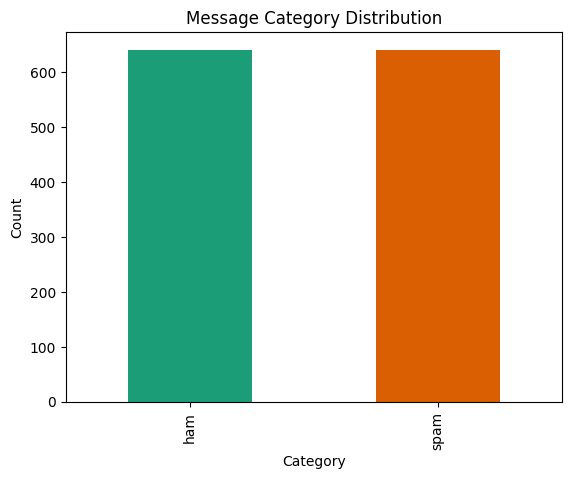

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
balanced_mail_data.groupby('Category').size().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Message Category Distribution")
plt.show()

In [ ]:
# checking the number of rows and columns in the dataframe
balanced_mail_data.shape

(1282, 2)

In [ ]:
# label spam mail as 0;  ham mail as 1;

balanced_mail_data.loc[balanced_mail_data['Category'] == 'spam', 'Category',] = 0
balanced_mail_data.loc[balanced_mail_data['Category'] == 'ham', 'Category',] = 1

In [ ]:
# separating the data as texts and label
X = balanced_mail_data['Message']
Y = balanced_mail_data['Category']

In [ ]:
print(X)

0       December only! Had your mobile 11mths+? You ar...
1       Dear Voucher Holder, To claim this weeks offer...
2       Had your contract mobile 11 Mnths? Latest Moto...
3       What do U want for Xmas? How about 100 free te...
4       You are a winner U have been specially selecte...
                              ...                        
1277    Sorry I missed your call let's talk when you h...
1278    We tried to contact you re your reply to our o...
1279    TBS/PERSOLVO. been chasing us since Sept for£3...
1280    500 free text msgs. Just text ok to 80488 and ...
1281    Thanks for your ringtone order, reference numb...
Name: Message, Length: 1282, dtype: object


In [ ]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1277    0
1278    0
1279    0
1280    0
1281    0
Name: Category, Length: 1282, dtype: object


In [ ]:
#Splitting the data into training data & test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [ ]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(1282,)
(1025,)
(257,)


In [ ]:
# transform the text data to feature vectors that can be used as input to the Logistic regression

feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# convert Y_train and Y_test values as integers

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [ ]:
print(X_train_features)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 11020 stored elements and shape (1025, 3596)>
  Coords	Values
  (0, 1745)	0.16748603863397185
  (0, 3094)	0.49117904736755896
  (0, 316)	0.20832469089883687
  (0, 3574)	0.20832469089883687
  (0, 2403)	0.20309591331578963
  (0, 3524)	0.19099753039985723
  (0, 1976)	0.24558952368377948
  (0, 2071)	0.16748603863397185
  (0, 2876)	0.18776461743343043
  (0, 3187)	0.24177945258990383
  (0, 2032)	0.17105985811389424
  (0, 843)	0.23183618266472228
  (0, 603)	0.22207803191789408
  (0, 3194)	0.22207803191789408
  (0, 1591)	0.24558952368377948
  (0, 307)	0.24558952368377948
  (0, 295)	0.24558952368377948
  (0, 302)	0.14661899553891578
  (1, 3012)	0.47342762682303396
  (1, 2231)	0.16487768178544387
  (1, 1700)	0.23671381341151698
  (1, 1115)	0.16487768178544387
  (1, 2047)	0.4281040739986689
  (1, 2493)	0.3915118805407799
  (1, 2187)	0.1440846444099974
  :	:
  (1022, 259)	0.24403034221163275
  (1022, 934)	0.24403034221163275
  (1022, 34

In [ ]:
# Training the logistic model
model = LogisticRegression(C=0.5)
# training the Logistic Regression model with the training data
model.fit(X_train_features, Y_train)

LogisticRegression(C=0.5)

In [ ]:
# Prediction on training data
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)
recall_on_training_data = recall_score(Y_train, prediction_on_training_data, average='binary')
f1_on_training_data = f1_score(Y_train, prediction_on_training_data, average='binary')

print('Accuracy on training data : ', accuracy_on_training_data)
print('Recall on training data : ', recall_on_training_data)
print('F1 Score on training data : ', f1_on_training_data)

Accuracy on training data :  0.9746341463414634
Recall on training data :  0.9960552268244576
F1 Score on training data :  0.974903474903475


In [ ]:

# Prediction on test data
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)
recall_on_test_data = recall_score(Y_test, prediction_on_test_data, average='binary')
f1_on_test_data = f1_score(Y_test, prediction_on_test_data, average='binary')

print('Accuracy on test data : ', accuracy_on_test_data)
print('Recall on test data : ', recall_on_test_data)
print('F1 Score on test data : ', f1_on_test_data)

Accuracy on test data :  0.933852140077821
Recall on test data :  0.9701492537313433
F1 Score on test data :  0.9386281588447654


In [ ]:
modell = MultinomialNB()
modell.fit(X_train_features, Y_train)


MultinomialNB()

In [ ]:
# Prediction on training data
prediction_on_training_data = modell.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)
recall_on_training_data = recall_score(Y_train, prediction_on_training_data, average='binary')
f1_on_training_data = f1_score(Y_train, prediction_on_training_data, average='binary')

print('Accuracy on training data : ', accuracy_on_training_data)
print('Recall on training data : ', recall_on_training_data)
print('F1 Score on training data : ', f1_on_training_data)

Accuracy on training data :  0.9892682926829268
Recall on training data :  0.9901380670611439
F1 Score on training data :  0.9891625615763546


In [ ]:
# Prediction on test data
prediction_on_test_data = modell.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)
recall_on_test_data = recall_score(Y_test, prediction_on_test_data, average='binary')
f1_on_test_data = f1_score(Y_test, prediction_on_test_data, average='binary')

print('Accuracy on test data : ', accuracy_on_test_data)
print('Recall on test data : ', recall_on_test_data)
print('F1 Score on test data : ', f1_on_test_data)

Accuracy on test data :  0.9455252918287937
Recall on test data :  0.9104477611940298
F1 Score on test data :  0.9457364341085271


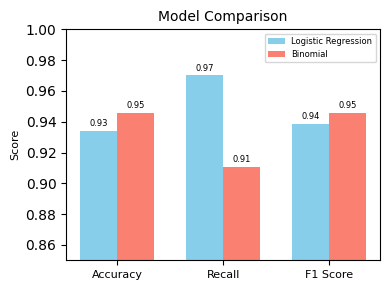

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics
metrics = ['Accuracy', 'Recall', 'F1 Score']
logistic_scores = [0.933852140077821, 0.9701492537313433, 0.9386281588447654]
binomial_scores = [0.9455252918287937, 0.9104477611940298, 0.9457364341085271]

# Set up bar positions
x = np.arange(len(metrics))
width = 0.35  # width of the bars

# Create plot
fig, ax = plt.subplots(figsize=(4, 3))  # small size (4 inches width, 3 inches height)
bars1 = ax.bar(x - width/2, logistic_scores, width, label='Logistic Regression', color='skyblue')
bars2 = ax.bar(x + width/2, binomial_scores, width, label='Binomial', color='salmon')

# Labels and title
ax.set_ylabel('Score', fontsize=8)
ax.set_title('Model Comparison', fontsize=10)
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=8)
ax.set_ylim(0.85, 1.0)
ax.legend(fontsize=6)  # small legend

# Show values on top of bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 2),  # closer to the bar because plot is small
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=6)  # smaller font for annotations

plt.tight_layout()
plt.show()


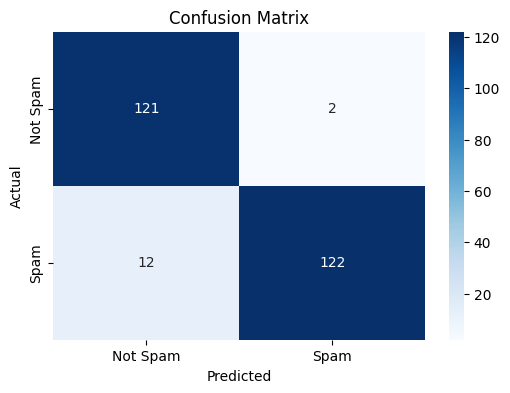

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix for test data
cm = confusion_matrix(Y_test, prediction_on_test_data)

# Display confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'],
            yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
#Building a predictive model
input_mail = ["Get rich quick! Work from home and earn $5000 a week. Limited spots available!"]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction

prediction = model.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Ham')

else:
  print('Spam')

[1]
Ham


In [ ]:
import pickle

# Save the Logistic Regression model
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save the fitted vectorizer
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(feature_extraction, f)

# Save the Naive Bayes model (modell)
with open('modell.pkl', 'wb') as f:
    pickle.dump(modell, f)

# Load the Logistic Regression model
with open('model.pkl', 'rb') as f:
    logistic_model = pickle.load(f)

# Load the fitted vectorizer
with open('vectorizer.pkl', 'rb') as f:
    feature_extraction = pickle.load(f)

# Load the Naive Bayes model
with open('modell.pkl', 'rb') as f:
    modell = pickle.load(f)



In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML
import pickle

# Load the Logistic Regression model and the fitted vectorizer
with open('model.pkl', 'rb') as f:
    logistic_model = pickle.load(f)

with open('vectorizer.pkl', 'rb') as f:
    feature_extraction = pickle.load(f)

# Load the Naive Bayes model
with open('modell.pkl', 'rb') as f:
    modell = pickle.load(f)

# Define the prediction function for both models
def predict_spam(email_text, model):
    email_vectorized = feature_extraction.transform([email_text])
    prediction = model.predict(email_vectorized)
    return prediction[0]

# Define the UI
title = widgets.HTML("<h2 style='color:#FFFF00'>📧 Email Spam Detector</h2>")

model_dropdown = widgets.Dropdown(
    options=['Logistic Regression', 'Naive Bayes'],
    value='Logistic Regression',
    description="<span style='color:red;'>Model:</span>",
    style={'description_width': 'initial'}
)

email_textbox = widgets.Textarea(
    placeholder='Type or paste the email content here...',
    description='Email Content:',
    layout=widgets.Layout(width='600px', height='200px'),
    style={'description_width': 'initial'}
)

button = widgets.Button(description="🔍 Detect Spam", button_style='success', layout=widgets.Layout(width='200px'))

output = widgets.Output()

def on_button_click(b):
    with output:
        clear_output()
        selected_model = logistic_model if model_dropdown.value == 'Logistic Regression' else modell
        prediction = predict_spam(email_textbox.value, selected_model)
        if prediction == 1:
           display(HTML("<div style='padding:10px; color:white; background-color:#27ae60; border-radius:8px;'>✅ <b>This email is NOT spam.</b></div>"))
        else:
           display(HTML("<div style='padding:10px; color:white; background-color:#e74c3c; border-radius:8px;'>🚫 <b>This email is SPAM!</b></div>"))


button.on_click(on_button_click)

# Inject CSS style for custom background, font, and image inclusion
display(HTML('''
<style>
    body {
        background-image: url('');
        background-size: cover;
        background-position: center;
        font-family: 'Segoe UI', sans-serif;
        color: white;
    }

    .widget-button {
        background-color: #27ae60 !important;
        border-radius: 8px;
    }

    textarea {
        font-size: 16pt !important;
        font-family: "Segoe UI", sans-serif;
        padding: 10px;
        border-radius: 8px;
        background-color: rgba(255, 255, 255, 0.8);
    }

    .widget-dropdown {
        background-color: rgba(255, 255, 255, 0.7);
        border-radius: 8px;
    }

    .widget-output {
        background-color: rgba(0, 0, 0, 0.5);
        border-radius: 8px;
        padding: 20px;
        margin-top: 20px;
    }

    .widget-container {
        border-radius: 15px;
        overflow: hidden;
        background-color: rgba(0, 0, 0, 0.7);
        padding: 30px;
    }
</style>
'''))

# Layout all components with custom styles
ui = widgets.VBox(
    [
        title,
        widgets.HBox([model_dropdown]),
        email_textbox,
        button,
        output
    ],
    layout=widgets.Layout(
        width='800px',  # wider container
        padding='20px',
        border='solid 2px #e74c3c',
        align_items='stretch',
        justify_content='flex-start',
        background_color='rgba(0, 0, 0, 0.7)',
        border_radius='15px',
    )
)

email_textbox.layout = widgets.Layout(width='750px', height='250px')  # increase email box size
button.layout = widgets.Layout(width='220px', height='40px')  # slightly bigger button

# Display the UI
display(ui)
